In [125]:
import os
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from sklearn import linear_model
from scipy import stats

In [82]:
def regress(x, y, title, ax, ay):
    x = x.to_numpy()
    y = y.to_numpy()
    np.random.seed(42)
    plt.scatter(x, y)
    
    #define the weight of the regression line
    m = (((np.nanmean(x) * np.nanmean(y)) - np.nanmean(x * y)) / ((np.nanmean(x) ** 2) - np.nanmean(x ** 2)))
    
    #define the bias of the regression line
    b = np.nanmean(y) - (m * np.nanmean(x))
    
    #define the equation of the regression line
    regression_line = [(m * xa) + b for xa in x]

    print("fitted y = " + str(m) + "x + " + str(b))
    
    #plot the graph
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel(ax)
    plt.ylabel(ay)
    plt.plot(x, regression_line)
    plt.show()

<h1>ONLY NEED CODE FROM HERE DOWN</h1>

In [2]:
append_owid = pd.read_csv("final_append.csv")
append_owid = append_owid.drop(["Unnamed: 0", "Unnamed: 0.1", "index", "iso_code"], axis=1)
temp = append_owid[[f"gas_production", f"oil_production", f"coal_production"]]
append_owid[f'fossil_production'] = temp.sum(axis=1)

In [3]:
final = pd.read_csv("final_w_rd.csv")
final = final.set_index(final['Unnamed: 0'])
final.index.name=None
final = final.drop(['Unnamed: 0', 'Africa_ghg.1'], axis=1)

<h3>Is the reduction in fossil fuel consumption related to a decrease in fossil fuel production</h3>

In [4]:
c_vs_p = final

def graph_C_vs_P(country):
    temp = c_vs_p[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production_{country}'] = temp.sum(axis=1)
    temp[f'fossil_consumption_{country}'] = c_vs_p[[f"fossil_fuel_consumption_{country}"]]
    temp.plot(kind="scatter", x=f"fossil_production_{country}", y=f'fossil_consumption_{country}')

/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


fitted y = 1.802721529873483x + -78.40250436498036


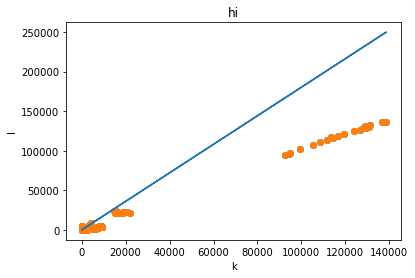

In [241]:
#all data
temp = append_owid[[f"gas_production", f"oil_production", f"coal_production"]]
temp[f'fossil_production'] = temp.sum(axis=1)
temp[f'fossil_fuel_consumption'] = append_owid["fossil_fuel_consumption"]
temp = temp.loc[(temp!=0).any(axis=1)]
# append_owid.plot(kind="scatter", x="fossil_production", y="fossil_fuel_consumption")
regress(temp["fossil_production"], temp["fossil_fuel_consumption"], 'hi', 'k', 'l')

fitted y = 0.0378552917309571x + 0.4683275627735526


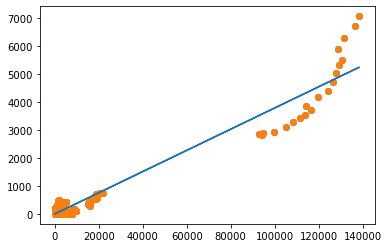

In [51]:
# append_owid.plot(kind="scatter", x="fossil_production", y="renewables_electricity")
temp = append_owid[["fossil_production", "renewables_electricity"]]
# temp = temp[temp["renewables_electricity"] == 0 and temp["fossil_production"] == 0]
temp = temp.loc[(temp!=0).any(axis=1)]
regress(temp["fossil_production"], temp["renewables_electricity"])

/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


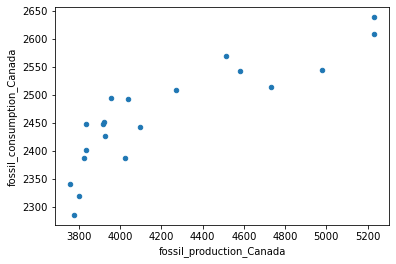

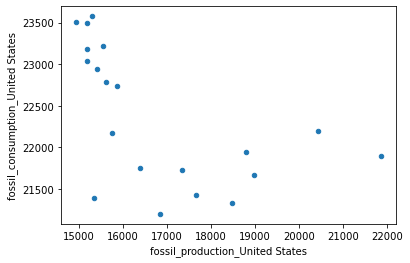

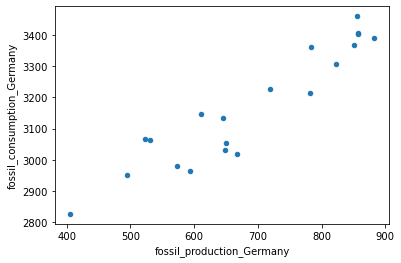

In [1040]:
graph_C_vs_P("Canada")
graph_C_vs_P("United States")
graph_C_vs_P("Germany")

<h3>Is fossil fuel production reduction correlated with clean energy production or consumption</h3>

In [1109]:
fossilP_vs_cleanP = final

def graphFossilP_vs_cleanP(country):
    temp = fossilP_vs_cleanP[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production_{country}'] = temp.sum(axis=1)
    temp[f'clean_production_{country}'] = fossilP_vs_cleanP[[f"renewables_electricity_{country}"]]
    temp.plot(kind="scatter", x=f'clean_production_{country}', y=f"fossil_production_{country}")
    return temp

def graphFossilP_vs_cleanC(country):
    temp = fossilP_vs_cleanP[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production_{country}'] = temp.sum(axis=1)
    temp[f'clean_consumption_{country}'] = fossilP_vs_cleanP[[f"renewables_consumption_{country}"]]
    temp.plot(kind="scatter", x=f'clean_consumption_{country}', y=f"fossil_production_{country}")
    return temp

#which clean energy helps reduce fossil fuel consumption
def graphFossilP_vs_C(energy, country, ending):
    if ending:
        ending = f"_{country}"
    else:
        ending = ""
    temp = fossilP_vs_cleanP[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production{ending}'] = temp.sum(axis=1)
    temp[f'fossil_production{ending}'] = temp[f'fossil_production{ending}']
    temp[f'{energy}_consumption{ending}'] = fossilP_vs_cleanP[[f"{energy}_consumption_{country}"]]
    temp.plot(kind="scatter", x=f'{energy}_consumption{ending}', y=f"fossil_production{ending}")
    return temp

/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<AxesSubplot:xlabel='solar_consumption', ylabel='fossil_production'>

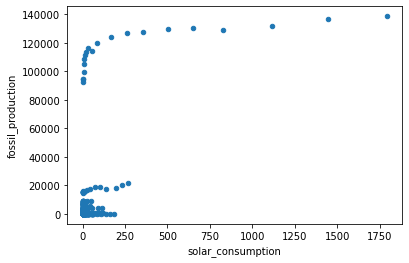

In [16]:
#all data
energy = "solar"
temp = append_owid[[f"{energy}_consumption"]]
temp["fossil_production"] = append_owid["fossil_production"]
temp["fossil_consumption"] = append_owid["fossil_fuel_consumption"]
temp = temp.dropna()
temp.plot(kind="scatter", x=f"{energy}_consumption", y="fossil_production")

<AxesSubplot:xlabel='renewables_consumption', ylabel='co2'>

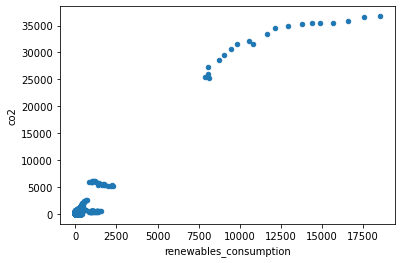

In [44]:
energy = "renewables"
temp = append_owid[[f"{energy}_consumption", "co2"]]
temp.plot(kind="scatter", x=f"{energy}_consumption", y="co2")

/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


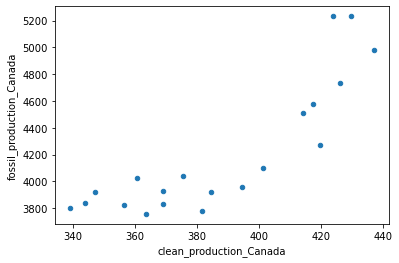

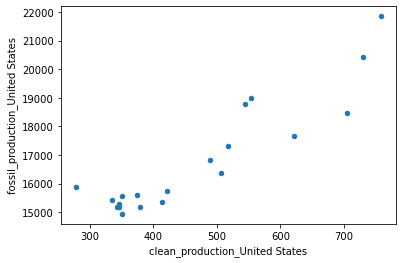

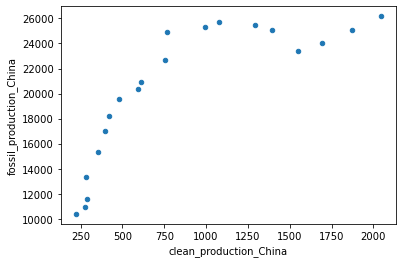

In [869]:
graphFossilP_vs_cleanP("Canada")
graphFossilP_vs_cleanP("United States")
graphFossilP_vs_cleanP("China")

<h3>Is clean energy production or consumption correlated with investment into R&D</h3>

fitted y = 46.93064959954756x + 74.33216047294606


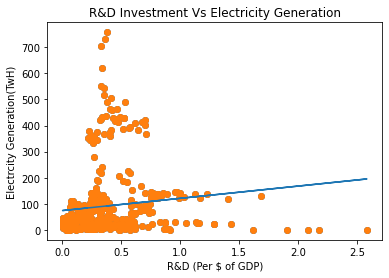

In [106]:
temp = append_owid
temp = temp.dropna(subset=['rd'])
temp = temp[temp.rd != 0]
temp.to_csv('renewable_electricity_rd.csv')
# temp.plot(kind="scatter", x="rd", y="renewables_electricity")
regress(temp['rd'], temp['renewables_electricity'], "R&D Investment Vs Electricity Generation", "R&D (Per $ of GDP)", "Electrcity Generation(TwH)")

In [141]:
#co2, percent share clean energy, high pct change in fossil fuels, renewable / dollar, renewable / capita, high pct change in energy consumption
features = append_owid[["country", "co2", "renewables_share_elec", "renewables_share_energy", "renewables_energy_per_capita", "electricity_generation", "energy_cons_change_pct"]]
features['fossil_prod_change_pct'] = append_owid["fossil_production"].pct_change().mul(100)
features['intensity'] = append_owid["renewables_electricity"].divide(append_owid["gdp"]) * 2e9 #kwh per dollar
features

/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,country,co2,renewables_share_elec,renewables_share_energy,renewables_energy_per_capita,electricity_generation,energy_cons_change_pct,fossil_prod_change_pct,intensity
0,Africa,886.562,17.721,6.761,266.152,438.497,2.362,NaN,NaN
1,Africa,884.168,18.325,6.957,277.773,456.389,3.912,-0.021911,NaN
2,Africa,892.575,18.166,7.188,283.219,484.047,1.111,0.936970,NaN
3,Africa,967.220,17.035,6.673,268.796,505.200,4.746,8.222379,NaN
4,Africa,1036.686,17.012,6.556,276.158,536.015,7.156,8.089528,NaN
...,...,...,...,...,...,...,...,...,...
2535,Zimbabwe,12.226,54.070,NaN,NaN,9.388,-0.789,-25.013836,0.405584
2536,Zimbabwe,10.738,45.577,NaN,NaN,6.826,-14.633,-37.694129,0.247378
2537,Zimbabwe,9.582,55.968,NaN,NaN,7.310,NaN,8.376111,NaN
2538,Zimbabwe,11.854,56.947,NaN,NaN,9.133,NaN,22.557726,NaN


In [226]:
features = features[features["country"] != "World"]
avg_features = pd.DataFrame()

for i in range(0, features.shape[0], 20):
    avg_features[i] = (features.iloc[i:i+20].mean(axis=0))

In [227]:
avg_features = avg_features.transpose()
avg_features

,co2,renewables_share_elec,renewables_share_energy,renewables_energy_per_capita,electricity_generation,energy_cons_change_pct,fossil_prod_change_pct,intensity
0,1176.55545,17.46975,6.86835,286.23535,656.77215,2.908500,1.214523,NaN
20,4.36450,98.90425,NaN,NaN,5.22490,4.782118,-1.556729,0.417899
40,120.04885,0.71910,0.16850,21.91805,45.86850,4.223400,inf,0.001341
60,23.97200,68.98545,NaN,NaN,5.75230,8.541882,0.014435,0.081231
80,171.85690,30.30340,13.65045,2848.24710,115.67345,1.956500,-0.265083,0.103452
...,...,...,...,...,...,...,...,...
2420,114.87600,13.08495,3.12880,595.25180,49.66115,-0.759900,inf,0.090473
2440,166.91815,68.09985,21.85005,6846.53865,103.61760,-0.771200,8.991354,0.465040
2460,17.68185,2.14945,NaN,NaN,5.07595,5.167353,-7.157520,0.000486
2480,3.68275,96.90885,NaN,NaN,11.09400,2.837176,-100.000000,0.738952


In [228]:
avg_features = avg_features.dropna()


In [236]:
avg_features.loc[1000]

co2                                  3.372550
renewables_share_elec               99.971450
renewables_share_energy             75.955550
renewables_energy_per_capita    118081.712500
electricity_generation              14.265150
energy_cons_change_pct               3.758150
fossil_prod_change_pct            -100.000000
intensity                            2.250289
Name: 1000, dtype: float64

In [240]:
test = pd.DataFrame()
name = "renewables_share_energy"
temp = []
countries = []
count = 0
for i in avg_features.sort_values(by=[name])[name].values[0:5]:
    temp.append(i)
    countries.append(features["country"][avg_features.sort_values(by=[name]).index[count]])
    count += 1

count = 0
for i in avg_features.sort_values(by=[name])[name].values[-5:]:
    temp.append(i)
    countries.append(features["country"][avg_features.sort_values(by=[name]).index[-5 + count]])
    count += 1

test["Renewable Energy Per Capita"] = temp
test["Countries"] = countries
test

,Renewable Energy Per Capita,Countries
0,0.00070,Oman
1,0.00555,Turkmenistan
2,0.01015,Kuwait
3,0.01105,Saudi Arabia
4,0.02175,Trinidad and Tobago
5,30.64035,Austria
6,34.93470,New Zealand
7,41.30540,Brazil
8,66.74215,Norway
9,75.95555,Iceland


In [232]:
features["country"] == "Iceland"

0       False
1       False
2       False
3       False
4       False
        ...  
2535    False
2536    False
2537    False
2538    False
2539    False
Name: country, Length: 2520, dtype: bool

fitted y = 1.3522611707866213e-09x + -7.815419491117382


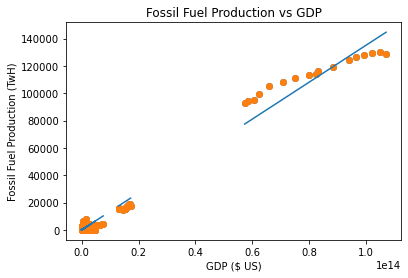

fitted y = 4.8512955696813344e-11x + 3.3348596870115372


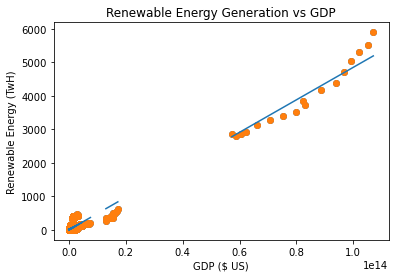

In [130]:
temp = append_owid[["fossil_production", "gdp"]]
regress(temp["gdp"], temp["fossil_production"], "Fossil Fuel Production vs GDP", "GDP ($ US)", "Fossil Fuel Production (TwH)")
temp.to_csv("gdp_fossil.csv")

temp = append_owid[["renewables_electricity", "gdp"]]
regress(temp["gdp"], temp["renewables_electricity"], "Renewable Energy Generation vs GDP", "GDP ($ US)", "Renewable Energy (TwH)")
temp.to_csv("gdp_renewable.csv")

/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


fitted y = 4.955252788927711x + 28.93054352198673


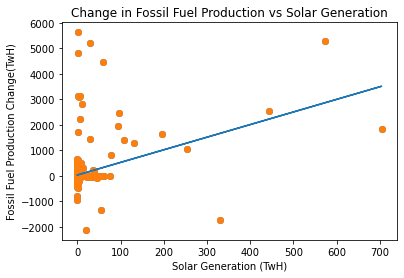

fitted y = 2.464311502263594x + 20.68363511532209


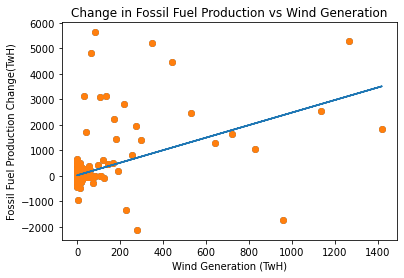

fitted y = 0.6912162088157543x + -9.914673987961322


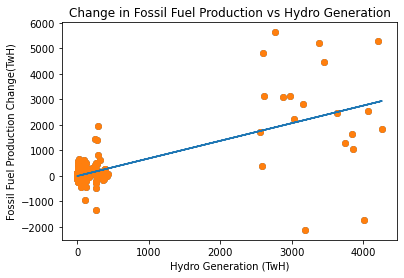

fitted y = 5.844258516937837x + -8.670721232922773


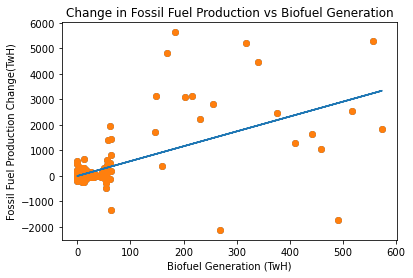

fitted y = 0.9188721152583763x + -73.71900092653024


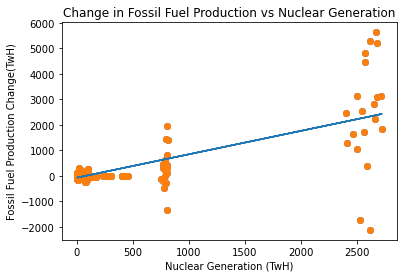

In [129]:
temp = append_owid[["fossil_prod_change_twh"]]
energy = ['solar', 'wind', 'hydro', 'biofuel', 'nuclear']
for i in energy:
    temp[f"{i}_electricity"] = append_owid[[f"{i}_electricity"]]
    temp = temp.dropna()
    temp = temp[temp[f"{i}_electricity"] != 0]
    # temp = temp[(np.abs(stats.zscore(temp)) < 3).all(axis=1)]
    # temp.plot(kind="scatter", x=f"{i}_share_elec", y="fossil_share_elec")
    regress(temp[f"{i}_electricity"], temp["fossil_prod_change_twh"], f"Change in Fossil Fuel Production vs {i.capitalize()} Generation", f"{i.capitalize()} Generation (TwH)", "Fossil Fuel Production Change(TwH)")
    temp.to_csv(f"fossil_change_{i}.csv")

In [13]:
def rd_vs_production(energy, country):
    temp = final[[f'{energy}_electricity_{country}', f'{country}_r&d']]
    temp.plot(kind="scatter", x=f'{country}_r&d', y=f'{energy}_electricity_{country}')

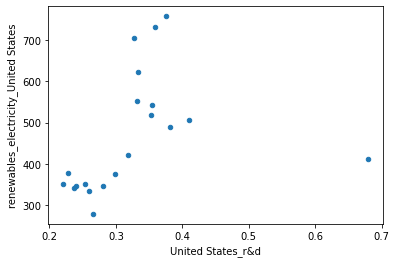

In [14]:
rd_vs_production("renewables", "United States")

<h3>Production to Consumption Ratio</h3>

In [52]:
ratio = final

non_clean_energy = ["coal", "oil", "gas", "fossil"]
def p_vs_c_ratio(energy, country):
    if(energy in non_clean_energy):
        if(energy == "fossil"):
            temp = ratio[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
            temp[f'fossil_production_{country}'] = temp.sum(axis=1)
            temp[f'{energy}_consumption_{country}'] = ratio[[f"fossil_fuel_consumption_{country}"]]
            temp.plot(kind="scatter", x=f"fossil_production_{country}", y=f'{energy}_consumption_{country}')
        else:
            temp = ratio[[f"{energy}_consumption_{country}", f"{energy}_production_{country}"]]
            temp.plot(kind="scatter", x=f"{energy}_production_{country}", y=f'{energy}_consumption_{country}')
    else:
        temp = ratio[[f"{energy}_consumption_{country}", f"{energy}_electricity_{country}"]]
        temp.plot(kind="scatter", x=f"{energy}_electricity_{country}", y=f'{energy}_consumption_{country}')
    
    return temp



fitted y = 2.7134233011951387x + 3.4021933668474276


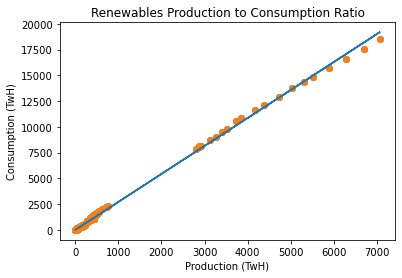

In [103]:
energy = "renewables"

temp = append_owid[[f"{energy}_electricity", f"{energy}_consumption"]]
temp = temp.dropna()
regress(temp[f"{energy}_electricity"], temp[f"{energy}_consumption"], f"{energy.capitalize()} Production to Consumption Ratio", "Production (TwH)", "Consumption (TwH)")

<h3>What renewable energy reduces fossil fuel production the most</h3>

<h3>Does a reduction in fossil fuels consumption correlate to a reduction in GHG</h3>

In [ ]:
fossil_vs_co2 = final

def calc_fossil_vs_ghg(country):
    temp = fossil_vs_co2[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production_{country}'] = temp.sum(axis=1)
    temp[f'co2_{country}'] = fossil_vs_co2[[f"co2_{country}"]]
    nancount = 0
    for i in range(temp.shape[1]):
        if(temp.iat[i, 3] == 0 or temp.iat[i, 4]==0):
            nancount += 1
            
    if nancount >= 4:
        return;
    temp.plot(kind="scatter", x=f"fossil_production_{country}", y=f'co2_{country}')
    

In [16]:
clone = final
avail = []
owidSet = {"Afghanistan"}
ghgSet = {"Afghanistan"}
owid2 = pd.read_csv("Macro/owid-energy-data.csv")

def owidList():
    for i in range(owid2.shape[0]):
        owidSet.add(owid2.iat[i, 1])

        
def ghgList():
    toRemove = []
    for c in owidSet:
        try:
            subset = final[f"{c}_ghg"]
        except KeyError:
            toRemove.append(c)
            
    
    for c in owidSet:
        if c not in toRemove:
            avail.append(c)
    
    avail.sort()



In [17]:
owidList()
ghgList()
print(avail)

['Africa', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Niger

In [6]:
import warnings
warnings.filterwarnings('ignore')

# for country in avail:
#     calc_fossil_vs_ghg(country)

### Energy Efficiency vs CO2 Emission

In [71]:
efficiency = final

def efficiencyVSco2(energy,country):

    temp = efficiency[[f"{energy}_electricity_{country}", f"{energy}_consumption_{country}", f"co2_{country}"]]
#     efficiency[f'fossil_production_{country}'] = temp.sum(axis=1)
    temp[f'{energy}_efficiency_{country}'] = temp[f'{energy}_electricity_{country}'] / temp[f'{energy}_consumption_{country}']
    temp.plot(kind="scatter", x = f"{energy}_efficiency_{country}", y = f"co2_{country}")


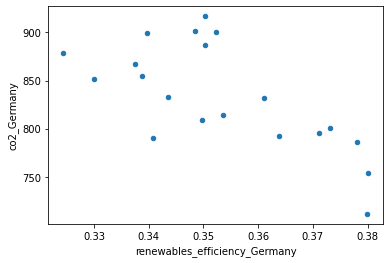

In [77]:
efficiencyVSco2("renewables", "Germany")